## Pattinaggio con CartPole

> **Problema**: Se Peter vuole sfuggire al lupo, deve essere in grado di muoversi più velocemente di lui. Vedremo come Peter può imparare a pattinare, in particolare a mantenere l'equilibrio, utilizzando il Q-Learning.

Per prima cosa, installiamo la libreria gym e importiamo le librerie necessarie:


In [1]:
#code block 1

## Crea un ambiente cartpole


In [ ]:
#code block 2

Per vedere come funziona l'ambiente, eseguiamo una breve simulazione per 100 passi.


In [ ]:
#code block 3

Durante la simulazione, dobbiamo ottenere osservazioni per decidere come agire. Infatti, la funzione `step` ci restituisce le osservazioni attuali, la funzione di ricompensa e il flag `done` che indica se ha senso continuare la simulazione o meno:


In [ ]:
#code block 4

Possiamo ottenere il valore minimo e massimo di quei numeri:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Esploriamo anche un altro metodo di discretizzazione usando i bin:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Eseguiamo ora una breve simulazione e osserviamo quei valori discreti dell'ambiente.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


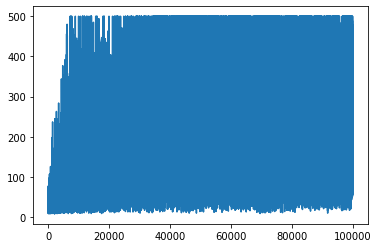

In [20]:
plt.plot(rewards)

Da questo grafico, non è possibile dedurre nulla, perché a causa della natura del processo di addestramento stocastico la durata delle sessioni di addestramento varia notevolmente. Per dare più senso a questo grafico, possiamo calcolare la **media mobile** su una serie di esperimenti, diciamo 100. Questo può essere fatto comodamente usando `np.convolve`:


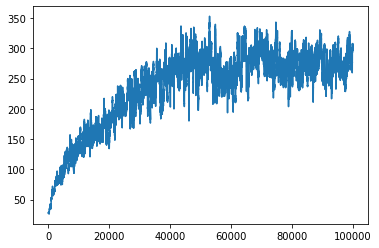

In [22]:
#code block 12

## Variare gli Iperparametri e Osservare il Risultato in Azione

Ora sarebbe interessante vedere effettivamente come si comporta il modello addestrato. Eseguiamo la simulazione, seguendo la stessa strategia di selezione delle azioni utilizzata durante l'addestramento: campionamento in base alla distribuzione di probabilità nella Q-Table:


In [23]:
# code block 13

## Salvare il risultato in una GIF animata

Se vuoi stupire i tuoi amici, potresti voler inviare loro l'immagine GIF animata del bilanciere. Per fare ciò, possiamo utilizzare `env.render` per produrre un fotogramma dell'immagine e poi salvarli in una GIF animata usando la libreria PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche potrebbero contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si consiglia una traduzione professionale eseguita da un traduttore umano. Non siamo responsabili per eventuali fraintendimenti o interpretazioni errate derivanti dall'uso di questa traduzione.
